# U.S. Medical Insurance Costs

# Multiple Regression Analysis on Insurance Data

## Introduction

The purpose of this project is to perform a multiple regression analysis on a dataset of insurance charges. Regression analysis is a statistical technique used to understand the relationship between one dependent variable (in this case, `charges`) and multiple independent variables (e.g., `age`, `bmi`, `children`, etc.). 

Through this project, we aim to:
1. Explore the dataset to understand the variables and their relationships.
2. Preprocess the data to ensure it is ready for analysis.
3. Build and evaluate a multiple regression model to predict medical insurance charges.
4. Interpret the results and provide insights into factors influencing insurance charges.

This notebook is structured as follows:
1. Data Import and Inspection
2. Data Preprocessing
3. Exploratory Data Analysis
4. Model Building
5. Results and Interpretation
6. Conclusion


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


## Data Import and Inspection

To begin, we import the insurance dataset and inspect its structure. This helps us understand the data types, missing values, and general layout.

The dataset has the following columns:
1. **age**: Age of the individual.
2. **sex**: Gender of the individual (male, female).
3. **bmi**: Body mass index.
4. **children**: Number of children/dependents.
5. **smoker**: Smoking status (yes, no).
6. **region**: Geographic region.
7. **charges**: Medical insurance charges.


In [9]:
insurance_data =pd.read_csv("C:\\Users\\EWURA\Downloads\\python-portfolio-example-solution\\python-portfolio-example-solution\\insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
# Inspect the dataset
insurance_data.head()
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Exploratory Data Analysis

In [11]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


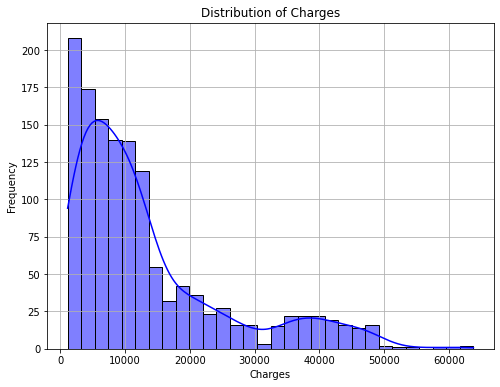

In [12]:
# Plot histogram for charges
plt.figure(figsize=(8, 6))
sns.histplot(insurance_data['charges'], kde=True, color='blue')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Distribution of Charges

The histogram below illustrates the distribution of insurance charges in the dataset. The distribution is right-skewed, indicating that most individuals incur lower insurance charges, with a smaller proportion having significantly higher charges.



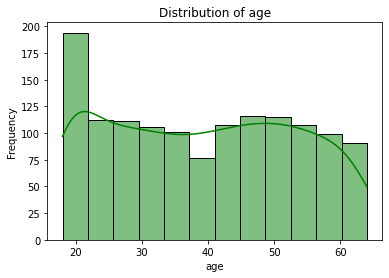

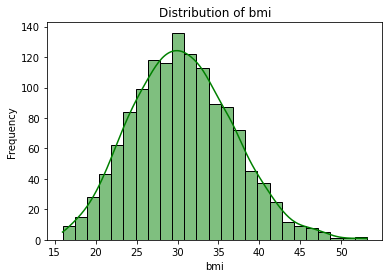

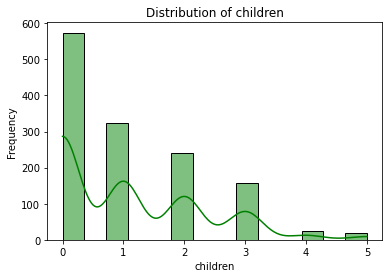

In [15]:
# Plot distributions
numerical_columns = ['age', 'bmi', 'children']
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(insurance_data[col], kde=True, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


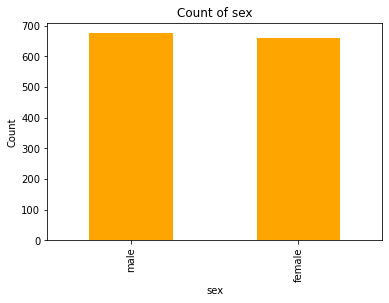

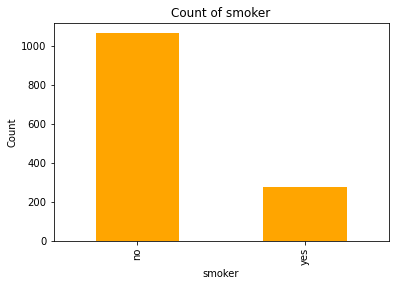

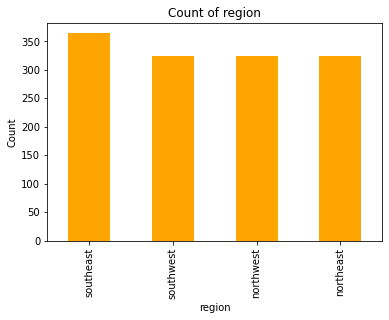

In [16]:
# Plot bar charts for categorical variables
categorical_columns = ['sex', 'smoker', 'region']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    insurance_data[col].value_counts().plot(kind='bar', color='orange')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


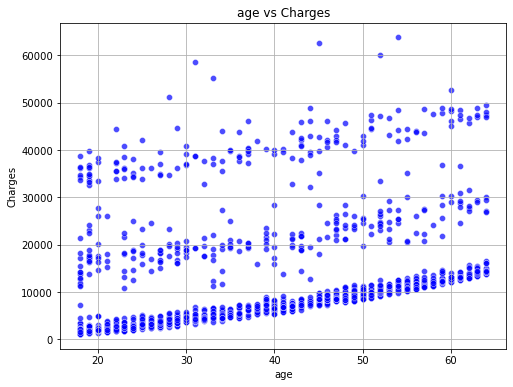

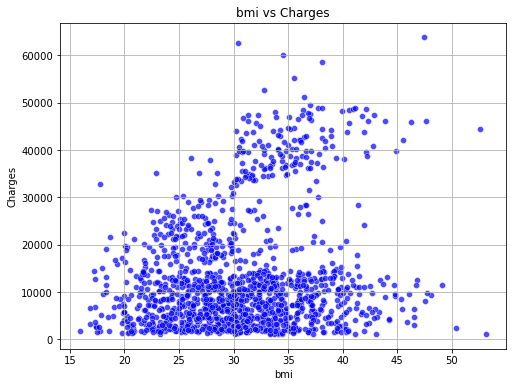

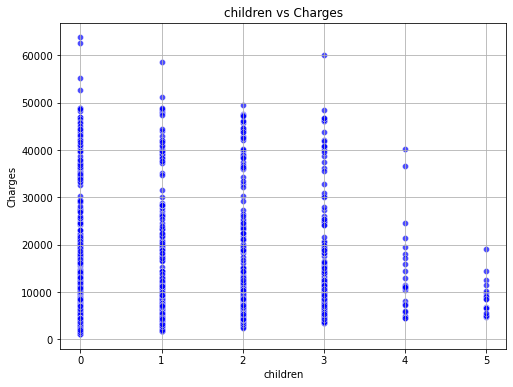

In [17]:
# Scatter plots for numerical variables against charges
numerical_columns = ['age', 'bmi', 'children']
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=insurance_data, x=col, y='charges', alpha=0.7, color='blue')
    plt.title(f'{col} vs Charges')
    plt.xlabel(col)
    plt.ylabel('Charges')
    plt.grid(True)
    plt.show()


### Age vs. Charges

This scatterplot shows the relationship between age and insurance charges. As age increases, there is a noticeable upward trend in charges, suggesting that older individuals tend to incur higher medical insurance costs. 

### BMI vs. Charges

This scatterplot illustrates the relationship between body mass index (BMI) and charges. While there is no strong linear trend, individuals with higher BMI values tend to have more variability in charges, particularly for higher values. 

### Number of Children vs. Charges

This scatterplot shows the number of children and their relationship with charges. There is no clear trend between the number of children and charges, suggesting that the number of dependents may have a minimal direct impact on medical costs. 



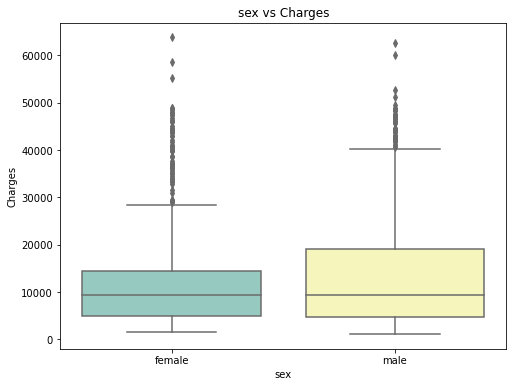

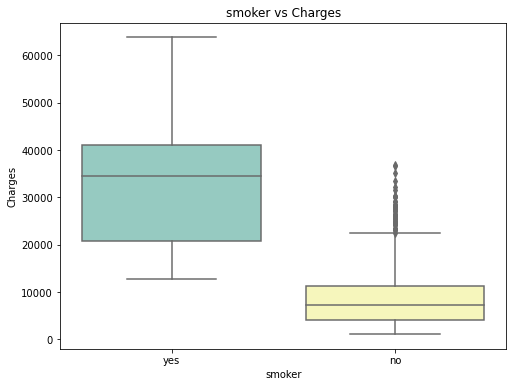

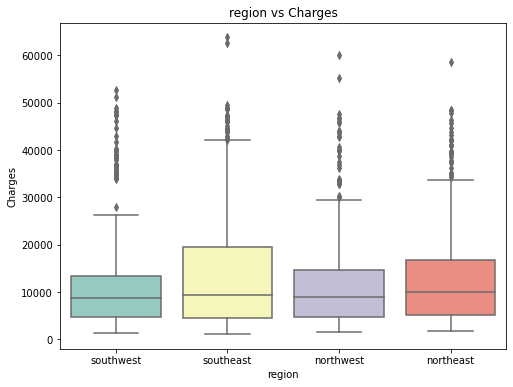

In [18]:
# Boxplots for charges by categorical variables
categorical_columns = ['sex', 'smoker', 'region']
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=insurance_data, x=col, y='charges', palette='Set3')
    plt.title(f'{col} vs Charges')
    plt.xlabel(col)
    plt.ylabel('Charges')
    plt.show()

### Charges by Sex

This boxplot compares insurance charges between males and females. Both distributions are similar in terms of median charges. However, the presence of outliers indicate some high-charge individuals in both groups.



